In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [2]:
TRAIN_DIR = '/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/dog_breed/train/'
TEST_DIR = '/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/dog_breed/test/'

In [3]:
IM_WIDTH, IM_HEIGHT = 224, 224

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

Found 8178 images belonging to 120 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [7]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IM_WIDTH, IM_WIDTH),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 2044 images belonging to 120 classes.


In [8]:
import keras

try:
    model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Git/commit_folder/DSBA/dog_cls_vgg16.h5')
except:
    conv_layers = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IM_HEIGHT, IM_WIDTH, 3)
    )

    for layer in conv_layers.layers:
        layer.trainable = False
    
    model = Sequential()
    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='softmax'))

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 120)               3

In [10]:
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/Git/commit_folder/DSBA/dog_cls_vgg16.h5',
    monitor = 'val_acc',
    vervose = 1,
    save_best_only=True
  )

In [19]:
history = model.fit(
                train_generator,
                epochs=10,
                validation_data=test_generator,
                callbacks=[cb_checkpoint]
                )

Epoch 1/10
32/32 [==============================] - 119s 4s/step - loss: 4.7745 - acc: 0.0122 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 2/10
32/32 [==============================] - 117s 4s/step - loss: 4.7746 - acc: 0.0122 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 3/10
32/32 [==============================] - 117s 4s/step - loss: 4.7744 - acc: 0.0124 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 4/10
32/32 [==============================] - 117s 4s/step - loss: 4.7752 - acc: 0.0122 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 5/10
32/32 [==============================] - 118s 4s/step - loss: 4.7744 - acc: 0.0121 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 6/10
32/32 [==============================] - 118s 4s/step - loss: 4.7740 - acc: 0.0122 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 7/10
32/32 [==============================] - 118s 4s/step - loss: 4.7750 - acc: 0.0121 - val_loss: 4.7893 - val_acc: 0.0127
Epoch 8/10
32/32 [==============================] - 117s 4s/step - loss: 4.7738 - a

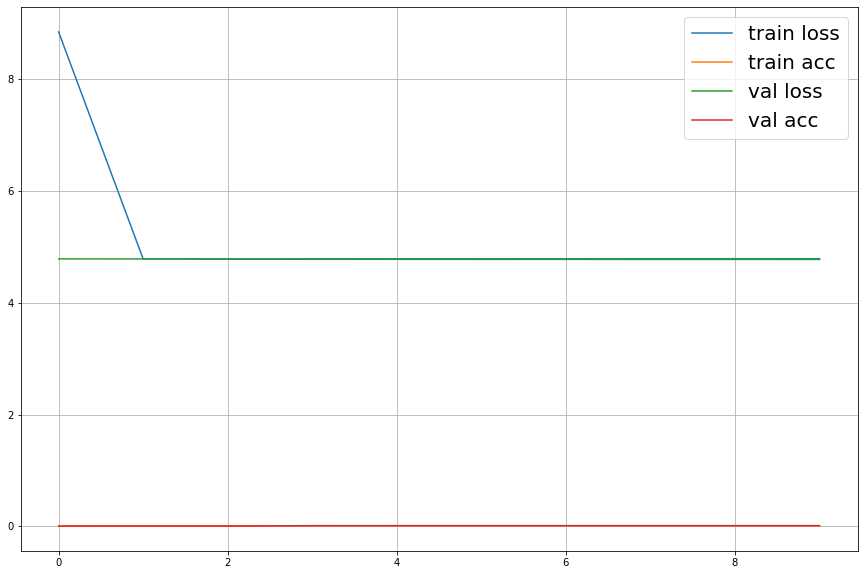

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend(prop={'size': 20}); plt.grid()
# plt.ylim(0, 1.0)

In [13]:
model.evaluate(test_generator)

32/32 [==============================] - 10s 300ms/step - loss: 4.7891 - acc: 0.0127


[4.7890706062316895, 0.012720156461000443]

In [14]:
import keras

best_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Git/commit_folder/DSBA/dog_cls_vgg16.h5')

In [15]:
best_model.evaluate(test_generator)

32/32 [==============================] - 10s 298ms/step - loss: 4.7868 - acc: 0.0127


[4.786776542663574, 0.012720156461000443]